# Decison Trees

- Decision trees can either classify data or predict outcomes based on a series of if-else questions about individual features

- The objective in building this predictive decision tree model is to predict target customers who are likely to buy a car based on the characteristics of previous buyers purchase history. This would be far too complex for a human to compute.

- The variables that will be used to teach the decision tree model are Gender, Age, and Salary

- The challenge for a car dealership is to target their sales and marketing resources at in the best possible way. I.e., to spend time on a category of customer who is more likely to buy a car

- This algorithm will help to solve that problem for the car dealership based on a dataset of 1,000 previous purchases

- The decision tree will classify likely customers in a binary way, 1 means they are predicted to purchase a car and 0 means that they are predicted to not purchase a car



In [ ]:
#Numpy for working with arrays
import numpy as np 

#Pandas for working with data sets                     
import pandas as pd  

#The decision tree inport comes from sklearn - used for modelling and predictive analytics
from sklearn import tree  

#Needed for the file upload function and is used for file related reading and writing options
import io     
                                  
#Needed to import a file that is stored on the local drive
from google.colab import files                  
uploaded = files.upload()
car_df = pd.read_csv(io.BytesIO(uploaded['car_data.csv']), header = 0) #The io.BytesIO optimises the dataset to work faster as it is now stored in RAM. Also it enables the uploaded file which is stored in a variable to be used as a file object

Saving car_data.csv to car_data.csv


In [ ]:
# Shows the size of the dataframe - in this case, 1000 rows and 5 columns
print("Dataframe shape: " + str(car_df.shape) + "\n")                                 

# Shows some useful stats to visualise the data
car_df.describe()                                                                    

Dataframe shape: (1000, 5)



,User ID,Gender,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.484000,40.106000,72689.000000,0.402000
std,288.819436,0.499994,10.707073,34488.341867,0.490547
min,1.000000,0.000000,18.000000,15000.000000,0.000000
25%,250.750000,0.000000,32.000000,46375.000000,0.000000
50%,500.500000,0.000000,40.000000,72000.000000,0.000000
75%,750.250000,1.000000,48.000000,90000.000000,1.000000
max,1000.000000,1.000000,63.000000,152500.000000,1.000000


In [ ]:
# Display the first five lines of the dataset to ensure the upload worked correctly and to check content
car_df.head(5)            

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


- To work, the decision tree needs all of the data to be shown in numerical format. We need to map the feature "Gender" to numerical values. 1 is used for male and 0 for female

In [ ]:
gender = {'Male': 1, 'Female': 0}                         # Gender variable is declared as a dictionary with "Male" assigned the value 1 and "Female" assigned the value 0
car_df['Gender'] = car_df['Gender'].map(gender)           # The current values of the "Gender" feature are now mapped to the above dictionary values. 1 instead of "Male" and 0 for "Female"

car_df.head()                                             # Display a sample of 5 rows of the data again to see if the above worked correctly

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


- Below we need to separate out all of the x values for the decision tree. 
- The x values will be the independant variables and are "Gender", "Age" and "Annual Salary". 
- Obviously the feature "User ID" will not be included as this will have no bearing on the outcome of the dependant variable y and is just used as a unique identifier for the data set.

In [ ]:
# The "features" variable is assigned the columns Gender, Age and AnnualSalary. The count starts at 0 which is why 1=Gender and not "User ID"
features = list(car_df.columns[1:4])   

# Returns the below list which confirms we have the correct variables to continue
features                                

['Gender', 'Age', 'AnnualSalary']

- The y variable is assigned to the feature "Purchased". This is what we want to predict
- The x variable is assigned the features, "Gender", "Age", and "Annual Salary"
- The decision tree classifier is instantiated and assigned to the variable "model" and the max depth of the tree is set to 4
- The data is then split into training data and test data (80/20 split)
- The x training features and y training feature and now fit together




In [ ]:
# used to split the data into training and testing
from sklearn.model_selection import train_test_split 

# used to check the accuracy of the model on the test data
from sklearn.metrics import accuracy_score           


from sklearn.metrics import mean_squared_error as MSE

# The y variable is assinged the values of the "Purchased" feature  
y = car_df["Purchased"]                                 

# The x variable is assinged the values of the "Gender", "Age", and "AnnualSalary" features 
X = car_df[features]                                  

# Decision tree classifier declared and assigned to model
model = tree.DecisionTreeClassifier(max_depth=12)       

# This code splits the data into training data (80%) for training the model, and testing data (20%) for testing accuracy after training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 

# The x features are now fitted to the y variable target, and are the values assinged to model
model = model.fit(X_train, y_train)                                    

# The y_predicted value is the label output of the x input. The x input value is not part of the training data in order to ensure test accuracy of the tree, so as to prevent memorisation of results 
y_test_predicted = model.predict(X_test)                                    


y_train_predicted = model.predict(X_train)

# The accuracy score for the test data is assinged to accuracy_test variable
accuracy_test = accuracy_score(y_test, y_test_predicted)*100

# The accuracy score for the training data is assinged to accuracy_train variable
accuracy_train = accuracy_score(y_train, y_train_predicted)*100

# This scores predicts how often a correct prediction is made based on the unseen test data
print("The accuracy score for the test data is: " + str(accuracy_test) + "%")                

# This scores predicts how often a correct prediction is made based on the seen training data
print("The accuracy score for the training data is: " + str(accuracy_train) + "%")           



The accuracy score for the test data is: 90.5%
The accuracy score for the training data is: 98.0%


- The below displays the decision tree


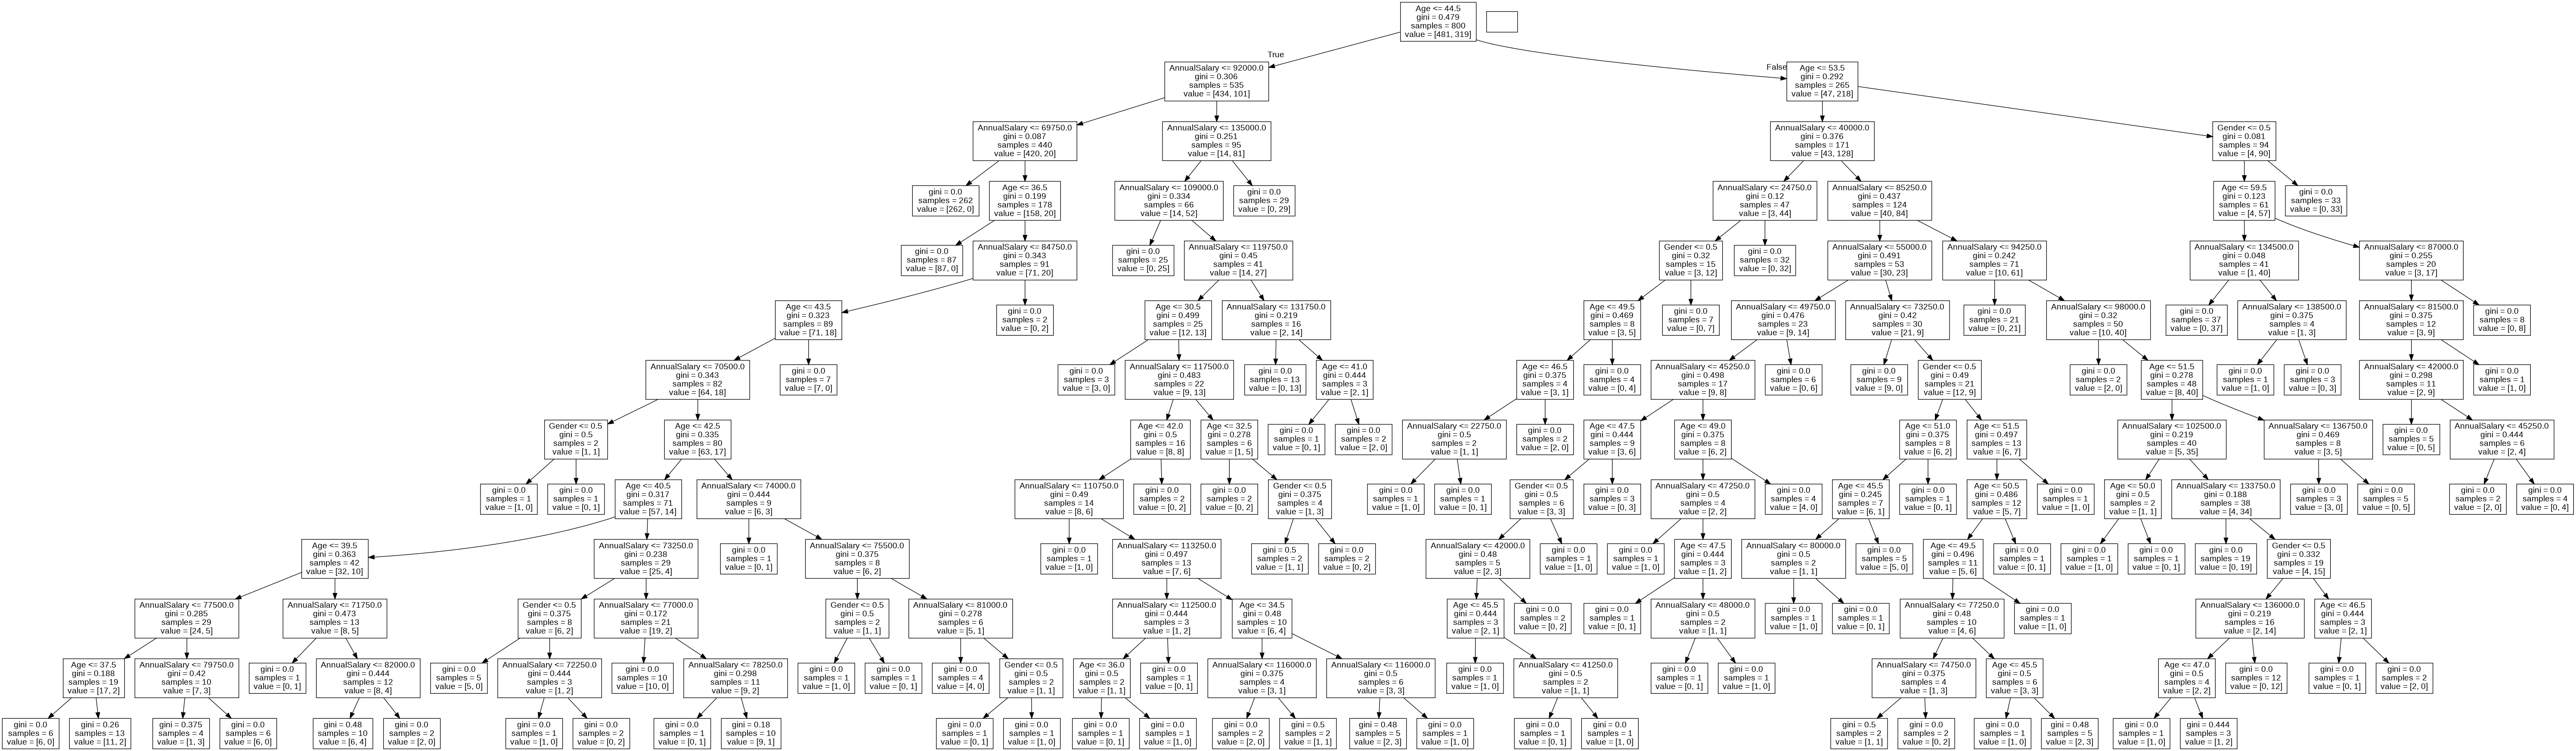

In [ ]:
from IPython.display import Image  
from six import StringIO
import pydot

dot_data = StringIO()  

tree.export_graphviz(model, out_file=dot_data, feature_names=features)   # From sklearn library - used to export a decision tree graph in dot format. The parameters are as follows: 1) The decision tree. 2) Name of the output file, i.e., "dot_data". 3) Names of each feature.
                                                                       # Returns a string representation of the input tree in GraphViz dot format   
                                                                      
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())  

## Ensemble learning: using a random forest

- Random forest classifier is used as a model validation technique
- This is used to ensure that the model performs as expected on unseen data
- If the model accuracy is similar to the accuracy of the training data results then the model is "validated"
- The goal of model validation is to end up with the best performing model possible
- We'll use a random forest of 1000 decision trees to predict employment of 2 random people with their "Gender", "Age" and "Salary" as the independant variables


In [ ]:
# Import RandomForestClassifier from sklearn.ensemble library
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier instantiated and assigned to model variable
model = RandomForestClassifier(n_estimators=10000)

# Model is fit with testing data
model = model.fit(X_test, y_test)


# The .predict metod with give a prediction result. A result of 0 means that this random customer is not predicted to buy a car. The 3 parameters enetered are {1:male, 35:age, 65000:salary}
print(model.predict([[1, 35, 65000]]))
print("A [0] result means false - i.e., this random customer is not predicted to but a car")

# A result of 1 means that this random customer is not predicted to buy a car. The 3 parameters enetere are {1:male, 35:age, 65000:salary}
print(model.predict([[0, 100, 107500]]))
print("A [1] result means true - i.e., this random customer is predicted to but a car")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


[1]
